In [1]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import scipy.misc

Using Theano backend.
Using gpu device 0: Quadro M4000 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [2]:
batch_size = 32
nb_classes = 2
nb_epoch = 20
data_augmentation = True

# Data loading and selecting suitable classes

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
y_train.shape

(50000, 1)

In [5]:
index_cars_train = [i for i, j in enumerate(y_train) if j in (1, 9)]
index_cars_test = [i for i, j in enumerate(y_test) if j in (1, 9)]

In [6]:
y_train_ = y_train[index_cars_train]
y_test_ = y_test[index_cars_test]
X_train_ = X_train[index_cars_train]
X_test_ = X_test[index_cars_test]

In [7]:
y_test_ = np.array([0 if j ==1 else 1 for j in (list(y_test_))])
y_train_ = np.array([0 if j ==1 else 1 for j in (list(y_train_))])

In [8]:
print('X_train_ shape:', X_train.shape)
print(X_train_.shape[0], 'train samples')
print(X_test_.shape[0], 'test samples')

X_train_ shape: (50000, 32, 32, 3)
10000 train samples
2000 test samples


In [9]:
Y_train_ = np_utils.to_categorical(y_train_, nb_classes)
Y_test_ = np_utils.to_categorical(y_test_, nb_classes)

In [10]:
Y_train_.shape

(10000, 2)

In [11]:
X_train_.shape

(10000, 32, 32, 3)

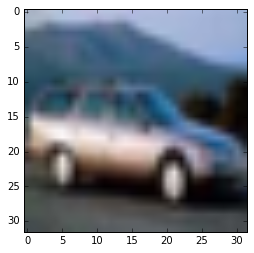

In [12]:
plt.imshow(X_train_[2])
plt.show()

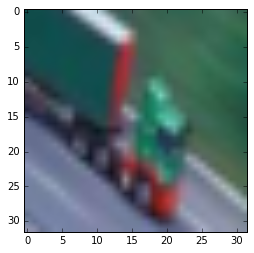

In [13]:
plt.imshow(X_train_[12])
plt.show()

# Data pre-processing and data augmentation

In [14]:
X_train_ = X_train_.astype('float32')
X_test_ = X_test_.astype('float32')
X_train_ /= 255
X_test_ /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train_, Y_train_,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test_, Y_test_),
              shuffle=True)
else:
    print('Using real-time data augmentation.')

    # this will do preprocessing and realtime data augmentation
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [15]:
datagen.fit(X_train_)

# Define the network

In [16]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train_.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [17]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [18]:
model.fit_generator(datagen.flow(X_train_, Y_train_,
                        batch_size=batch_size),
                        samples_per_epoch=X_train_.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test_, Y_test_))

Epoch 1/20
10000/10000 [==============================] - 8s - loss: 0.6941 - acc: 0.5036 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 2/20
10000/10000 [==============================] - 8s - loss: 0.6936 - acc: 0.5041 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 3/20
10000/10000 [==============================] - 8s - loss: 0.6855 - acc: 0.5457 - val_loss: 0.6358 - val_acc: 0.6535
Epoch 4/20
10000/10000 [==============================] - 8s - loss: 0.6288 - acc: 0.6532 - val_loss: 0.5899 - val_acc: 0.6905
Epoch 5/20
10000/10000 [==============================] - 8s - loss: 0.6066 - acc: 0.6750 - val_loss: 0.5637 - val_acc: 0.7145
Epoch 6/20
10000/10000 [==============================] - 8s - loss: 0.5669 - acc: 0.7076 - val_loss: 0.5300 - val_acc: 0.7390
Epoch 7/20
10000/10000 [==============================] - 8s - loss: 0.5342 - acc: 0.7309 - val_loss: 0.4877 - val_acc: 0.7580
Epoch 8/20
10000/10000 [==============================] - 8s - loss: 0.5118 - acc: 0.7529 - val_loss: 0.4950 - 

# A bit more on the performance

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
TrueLabels = y_test_
PredictedLabels = model.predict_classes(X_test_)

1984/2000 [============================>.] - ETA: 0s

In [21]:
target_names = ['Automobile', 'Trucks']
print(classification_report(TrueLabels, PredictedLabels, target_names=target_names))

             precision    recall  f1-score   support

 Automobile       0.86      0.96      0.91      1000
     Trucks       0.96      0.84      0.89      1000

avg / total       0.91      0.90      0.90      2000



In [22]:
print('Area under the curve (AUC) is:', roc_auc_score(TrueLabels, PredictedLabels))

Area under the curve (AUC) is: 0.9005


In [23]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(TrueLabels, PredictedLabels)
roc_auc = auc(false_positive_rate, true_positive_rate)

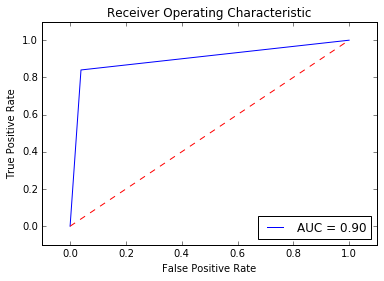

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

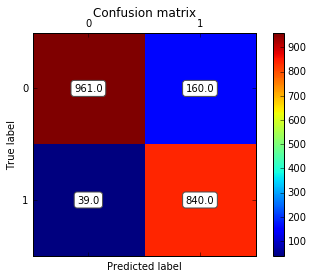

In [26]:
cm = confusion_matrix(PredictedLabels, TrueLabels)
fig, ax = plt.subplots()
im = ax.matshow(cm)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix')
fig.colorbar(im)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Save the model

In [27]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [28]:
X_train_.shape[1:]

(32, 32, 3)

In [29]:
img_names = ['car.jpg','truck.jpg']

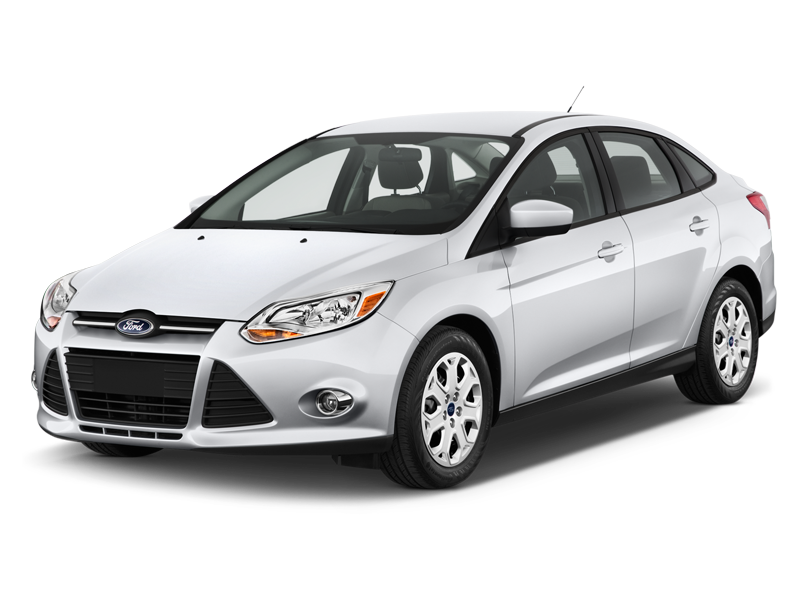

In [30]:
Image(filename='car.jpg')

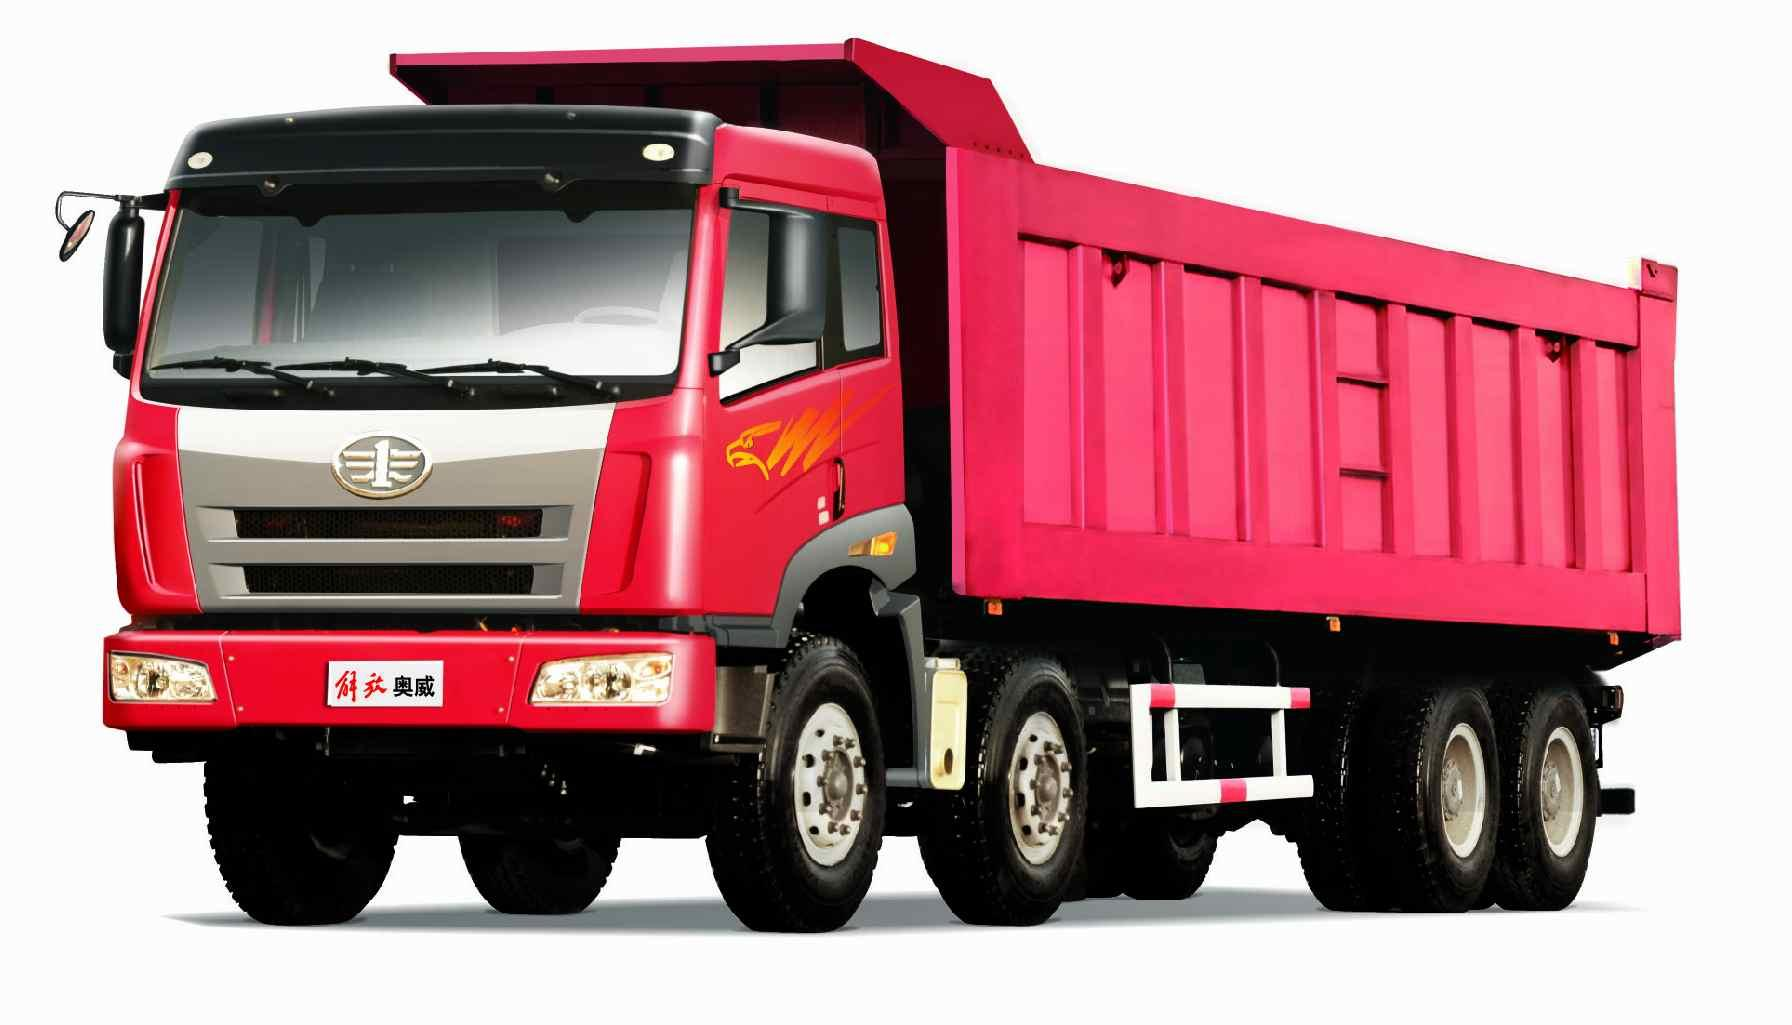

In [31]:
Image(filename='truck.jpg')

In [32]:
def load_and_scale_imgs(img_names):
 
   imgs = [np.stack(scipy.misc.imresize(scipy.misc.imread(img_name, mode = 'RGB' ), (32, 32)).astype('float32')) 
     for img_name in img_names]
   return np.array(imgs) / 255

In [33]:
S = load_and_scale_imgs(img_names)

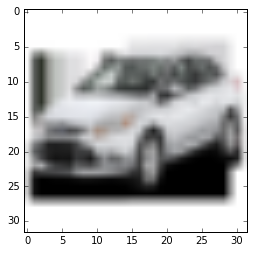

In [34]:
plt.imshow(S[0])
plt.show()

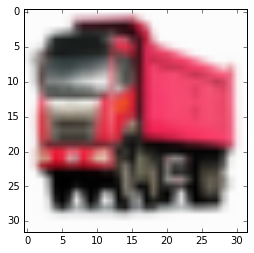

In [35]:
plt.imshow(S[1])
plt.show()

In [36]:
model.predict_classes(S)

2/2 [==============================] - 0s


array([0, 1])